   # Stock Market Analysis
        
 In this notebook I will do analysis of Tesla and Gamestop stock data using YFinance and Web Scrapping and then display through graph.
        

In [1]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly


In [2]:
pip install jupyterlab>=3 "ipywidgets>=7.6"

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode

In [4]:
tesla= yf.Ticker("TSLA")

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data.We Set the period parameter to max so we get information for the maximum amount of time.

In [5]:
tesla_data=tesla.history(period="max")

In [6]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


Using the requests library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. 

In [7]:
url="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data  = requests.get(url).text 
soup=BeautifulSoup(html_data,"html5lib")
tables=soup.find_all('table')

In [8]:
for index, table in enumerate(tables):
    if ('Tesla Quarterly Revenue' in str(table)):
        table_index=index

In [9]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text
        tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

tesla_revenue.head()
     



,Date,Revenue
0,2021-03-31,"$10,389"
1,2020-12-31,"$10,744"
2,2020-09-30,"$8,771"
3,2020-06-30,"$6,036"
4,2020-03-31,"$5,985"


We have to remove the empty strings in the tesla_Revenue dataframe.

In [10]:
tesla_revenue['Revenue']= tesla_revenue['Revenue'].str.replace('$','').str.replace(',','')

In [11]:
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Now I want to extract Gamestop Stock and Revenue data.

In [12]:
gme= yf.Ticker("GME")
gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


Using the requests library to download the webpage "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue" to get the ganestop revenue data. Save the text of the response as a variable named html_data.

In [13]:
html_data=requests.get('https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue').text
soup=BeautifulSoup(html_data,'html5lib')

tables = soup.find_all('table')
for i,table in enumerate(tables):
    if('GameStop Quarterly Revenue' in str(table)):
       tbleIndex= i
    
    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[tbleIndex].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text
        gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

gme_revenue.head()

,Date,Revenue
0,2021-01-31,"$2,122"
1,2020-10-31,"$1,005"
2,2020-07-31,$942
3,2020-04-30,"$1,021"
4,2020-01-31,"$2,194"


In [14]:
gme_revenue['Revenue']=gme_revenue['Revenue'].str.replace("$",'').str.replace(',','')

## Plotting Tesla and GameStop Stock Data

In [15]:

plotly.offline.init_notebook_mode(connected=True)

The following graph takes a dataframe with stock data (contains Date and Close columns), a dataframe with revenue data (contains Date and Revenue columns), and the name of the stock.

In [16]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    plotly.offline.iplot(fig)
    
    

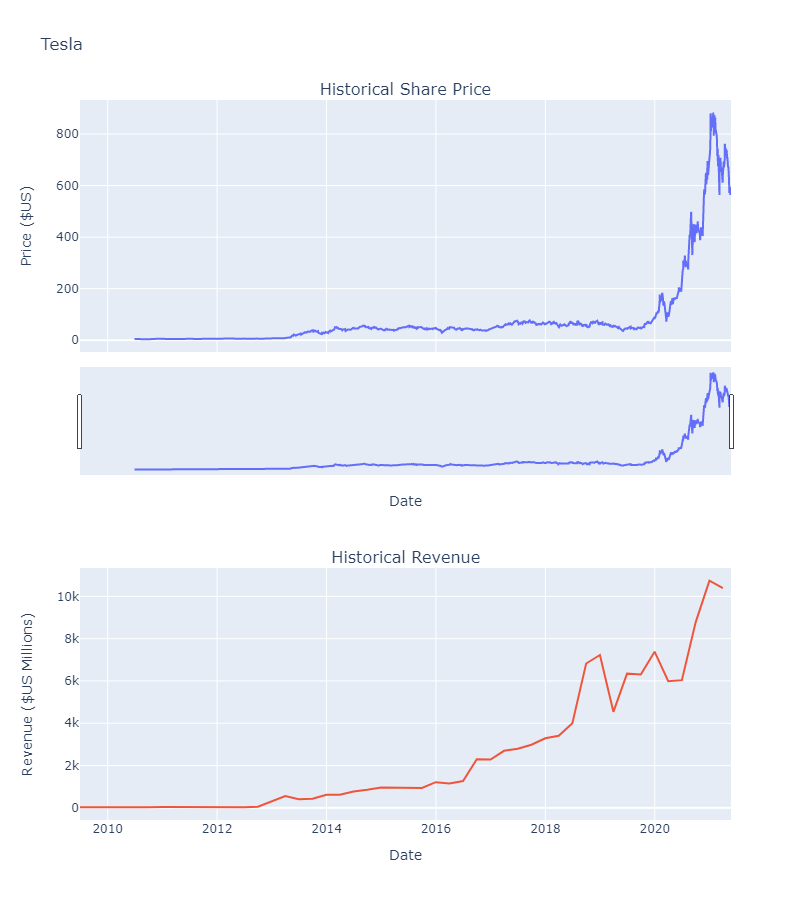

In [17]:
make_graph(tesla_data,tesla_revenue,'Tesla')

Now plotting Gamestop Stock

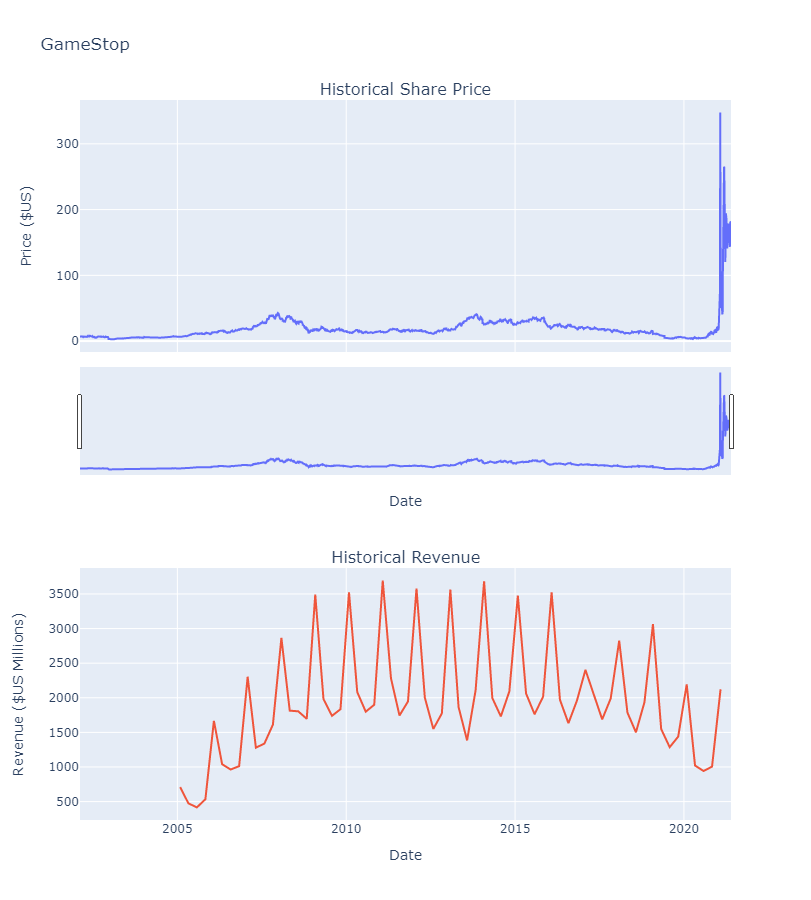

In [18]:
make_graph(gme_data, gme_revenue, 'GameStop')